In [1]:
import librosa
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing

In [5]:
pathAudio = 'C:/Users/Admin/OneDrive/Dokumente/Studium/Technology Lab/Technology Lab Team 4/Techno Titel/train/samples-stochastic/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [6]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)


samples = []
samples_sec_canal = []
for file_name in files:
    sample = AudioSegment.from_mp3(file_name)
    mono_samples = sample.split_to_mono()
    normalized_sample = normalize_sample(mono_samples[0])[0]
    resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 35))
    samples.append(resampled_sample)
    normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, int(len(normalized_sample) / 35))
    samples_sec_canal.append(resampled_sample_sec_canal)

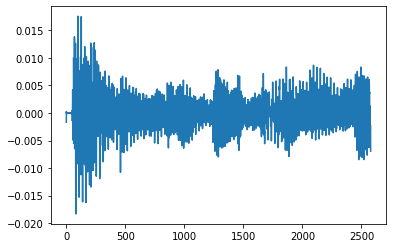

In [7]:
plt.plot(samples[0])
plt.show()

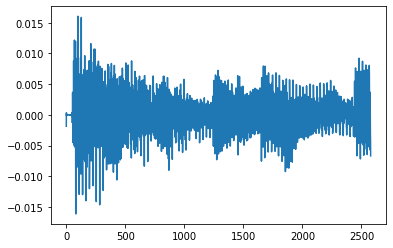

In [8]:
plt.plot(samples_sec_canal[0])
plt.show()

In [9]:
samples = np.array(samples)
full_song = []
for sample in samples:
    full_song.extend(sample)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1632\2919224953.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


In [10]:
full_song = np.array(full_song)
full_song.shape

(375603,)

In [11]:
len(min(samples, key=len))

466

In [12]:
batch_size = 2000
steps = 10
sum_batch_size = batch_size + steps
X = []
Y = []
for i in range(0, len(full_song) - batch_size, steps):
    if i < len(full_song) - sum_batch_size:
        X.append(full_song[i:i + batch_size])
        Y.append(True)

In [13]:
X = np.array(X)
X.shape

(37360, 2000)

In [14]:
X

array([[-1.67013526e-03,  2.83166264e-04, -1.27727597e-04, ...,
        -2.60783913e-03, -1.79865184e-03, -2.94874353e-03],
       [ 5.50945079e-06, -8.59932033e-06,  1.12206210e-05, ...,
         4.47179058e-03,  2.65859168e-03,  2.40070847e-03],
       [ 2.43063971e-05, -2.55004620e-05,  2.66602527e-05, ...,
        -1.42128388e-03, -2.20489140e-03,  4.53909017e-04],
       ...,
       [ 4.70276813e-05,  2.90822459e-05,  3.84201732e-05, ...,
        -7.42722306e-05,  7.55482092e-05, -7.68870946e-05],
       [ 1.27808031e-05, -6.76163775e-08, -2.08771126e-05, ...,
        -9.06273483e-05,  9.28574946e-05, -9.52438413e-05],
       [ 1.64288934e-05,  1.53597868e-06,  1.64479892e-05, ...,
        -1.23024341e-04,  1.28223708e-04, -1.34052460e-04]])

In [15]:
Y = np.array(Y).reshape(-1, 1)

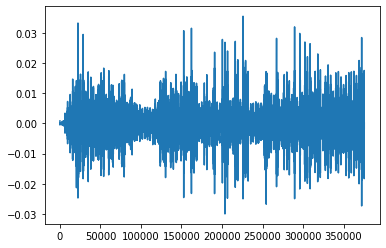

In [16]:
# Prepare further False data
reversed_data = np.array(full_song)
reversed_data = [num for num in reversed(reversed_data)]
plt.plot(reversed_data)
plt.show()

In [17]:
X_false = []
Y_false = []
for i in range(0, len(reversed_data) - batch_size, steps):
    if i < len(reversed_data) - sum_batch_size:
        X_false.append(np.array(reversed_data[i:i + batch_size]))
        Y_false.append(False)

In [18]:
X_false = np.array(X_false)
X_false.shape

(37360, 2000)

In [19]:
Y_false = np.array(Y_false).reshape(-1, 1)
Y_false.shape

(37360, 1)

In [20]:
X_train = []
Y_train = []
'''for i in range(len(X)):
    X_train.append(X[i])
    X_train.append(X_false[i])
    Y_train.append(True)
    Y_train.append(False)'''
X_train.append(X)
X_train.append(X_false)
Y_train.append(Y)
Y_train.append(Y_false)

In [21]:
X_train = np.array(X_train)
X_train.shape

(2, 37360, 2000)

In [22]:
X_train = X_train.reshape(-1, 2000)
X_train.shape

(74720, 2000)

In [23]:
Y_train = np.array(Y_train).reshape(-1, 1)
Y_train.shape

(74720, 1)

In [21]:
'''# Prepare False Data
from numpy import random
import difflib


def get_strange_end_part(samples, current_index, max_len):
    last_half = samples[current_index][1000:]
    x = random.randint(max_len)
    if x != current_index:
        sm = difflib.SequenceMatcher(None, last_half, samples[x][:1000])
        if sm.ratio() > 0.1:
            print('hello')
            return get_strange_end_part(samples, current_index, max_len)
        else:
            return samples[x][:1000]
    else:
        return get_strange_end_part(samples, current_index, max_len)


for i in range(len(samples)):
    first_half = samples[i][:1000]
    last_half = get_strange_end_part(samples, i, len(samples))
    new_sample = list(first_half) + list(last_half)
    X_train.append(new_sample)
    Y_train.append(False)'''

"# Prepare False Data\nfrom numpy import random\nimport difflib\n\n\ndef get_strange_end_part(samples, current_index, max_len):\n    last_half = samples[current_index][1000:]\n    x = random.randint(max_len)\n    if x != current_index:\n        sm = difflib.SequenceMatcher(None, last_half, samples[x][:1000])\n        if sm.ratio() > 0.1:\n            print('hello')\n            return get_strange_end_part(samples, current_index, max_len)\n        else:\n            return samples[x][:1000]\n    else:\n        return get_strange_end_part(samples, current_index, max_len)\n\n\nfor i in range(len(samples)):\n    first_half = samples[i][:1000]\n    last_half = get_strange_end_part(samples, i, len(samples))\n    new_sample = list(first_half) + list(last_half)\n    X_train.append(new_sample)\n    Y_train.append(False)"

In [24]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D,Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=10, kernel_size=1, input_shape=(2000, 1)))
model.add(LSTM(20, return_sequences=True))
model.add(Dense(100))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  #sgd
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2000, 10)          20        
                                                                 
 lstm (LSTM)                 (None, 2000, 20)          2480      
                                                                 
 dense (Dense)               (None, 2000, 100)         2100      
                                                                 
 flatten (Flatten)           (None, 200000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 200001    
                                                                 
Total params: 204,601
Trainable params: 204,601
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)
# 17 min

Epoch 1/100
  65/2335 [..............................] - ETA: 11:39 - loss: 0.7286 - accuracy: 0.4957

KeyboardInterrupt: 

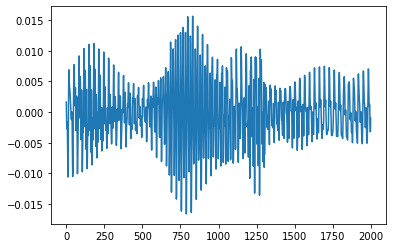

array([[0.5151258]], dtype=float32)

In [28]:
example_x_train = full_song[4000:6000]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 2000, 1)
model.predict(example_x_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\4277992107.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples_sec_ch = np.array(samples_sec_canal)


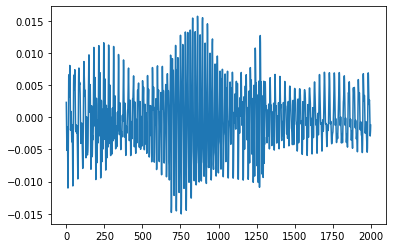

array([[0.5133826]], dtype=float32)

In [29]:
samples_sec_ch = np.array(samples_sec_canal)
full_song_sec_ch = []
for sample in samples_sec_ch:
    full_song_sec_ch.extend(sample)
second_channel_data = full_song_sec_ch[4000:6000]
plt.plot(second_channel_data)
plt.show()
second_channel_data = np.array(second_channel_data)
second_channel_data = second_channel_data.reshape(1, 2000)
model.predict(second_channel_data)

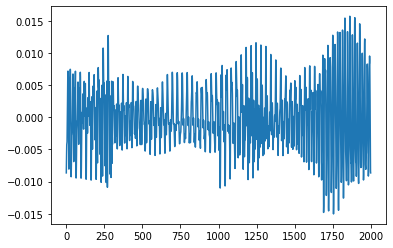

array([[0.51947]], dtype=float32)

In [30]:
extracted_sample = full_song_sec_ch[4000:6000]
new_start = extracted_sample[999:1999]
new_end = extracted_sample[0:1000]
switched_sample = new_start + new_end
plt.plot(switched_sample)
plt.show()
switched_sample = np.array(switched_sample)
switched_sample = switched_sample.reshape(1, 2000)
model.predict(switched_sample)

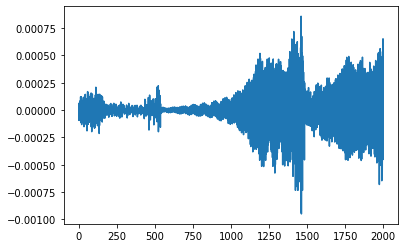

ValueError: in user code:

    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [31]:
reversed_sample = reversed_data[4000:6000]
plt.plot(reversed_sample)
plt.show()
reversed_sample = np.array(reversed_sample)
reversed_sample = reversed_sample.reshape(1, 2000)
model.predict(reversed_data)

In [ ]:
#filename = 'model_weights.h5'
#model.save(filename)